In [41]:
# import necessary packages
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [53]:
# read in dataframe from saved csv which has been preprocessed
df=pd.read_csv('/Users/rweiss/Documents/Yfinance Code/Analysis/preprocessed_df.csv', index_col= 0)
print(df.columns)

Index(['cik', 'ticker', 'name', 'date', 'shares', 'netincome', 'revenue', 'pe',
       'close', 'revenue growth for previous 2 years',
       'income growth for previous 2 years',
       'price growth for previous 2 years', 'price growth for next 2 years',
       'revtimesincome', 'revplusincome', 'revtimesrev', 'inctimesinc',
       'pricetimesrev', 'priceplusrev', 'priceplusrevplusinc',
       'inctimestimesrev'],
      dtype='object')


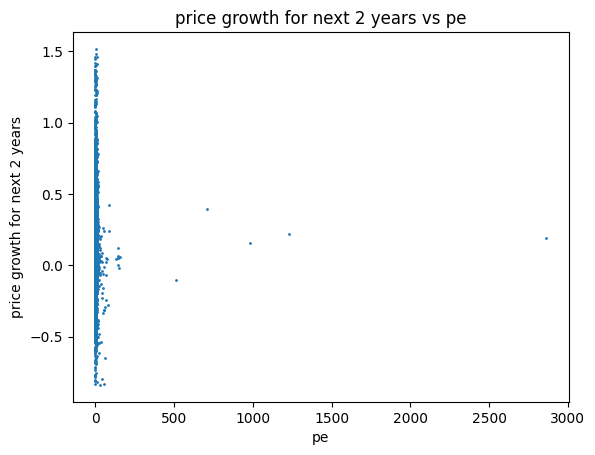

In [43]:
# set up x and y labels and title
x='pe'
y='price growth for next 2 years'
title= y+' vs '+x

# Plot the data points with small point size
plt.scatter(df[x], df[y], s=1)
# Set the title
plt.title(title)
# Set the y-axis label
plt.ylabel(y)
# Set the x-axis label
plt.xlabel(x)
plt.show()



In [44]:
# define training variables
x= ['revenue growth for previous 2 years', 'income growth for previous 2 years', 'price growth for previous 2 years']

# ['cik', 'ticker', 'name', 'date', 'shares', 'netincome', 'revenue', 'pe',
#        'close', 'revenue growth for previous 2 years',
#        'income growth for previous 2 years',
#        'price growth for previous 2 years', 'price growth for next 2 years',
#        'revtimesincome', 'revplusincome', 'revtimesrev', 'inctimesinc',
#        'pricetimesrev', 'priceplusrev', 'priceplusrevplusinc',
#        'inctimestimesrev']

#throw out outliers
for i in x:
    df=df[df[i].between(df[i].quantile(.005),df[i].quantile(.995))]

# get training data for x
x_train = df[x].values

# get training data for y
y_train = df[y].values

print(x_train[:4],y_train[:4])

[[ 0.009552    0.44144295]
 [-0.0162      0.36085019]
 [-0.00371     0.4185743 ]
 [-0.008856    0.27840964]] [ 0.21   0.512 -0.336 -0.215]


In [45]:
# scale x training data to same scale
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[ 0.261656   42.55168731]
Peak to Peak range by column in Normalized X:[ 8.53606265 12.65772024]


In [46]:
# run linear regression on data
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
# print model parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

SGDRegressor()
number of iterations completed: 6, number of weight updates: 37321.0
model parameters:                   w: [ 0.03609496 -0.01398846], b:[0.13731852]


Prediction on training set:
[0.14365993 0.11367143 0.12813864 0.12266229]
Target values 
[ 0.21   0.512 -0.336 -0.215]


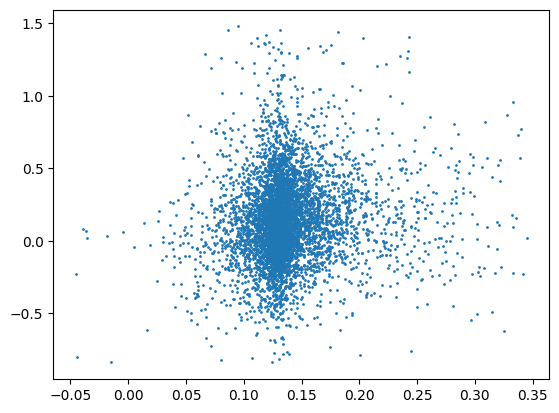

In [51]:
# make a prediction using sgdr.predict()
y_pred = sgdr.predict(x_norm)

# plot predicted vs actual
plt.scatter(y_pred, y_train, s=1)

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

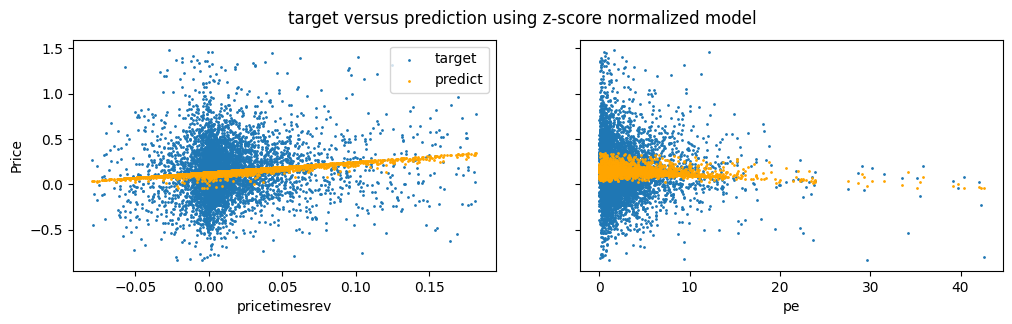

In [50]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(x),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target',s=1)
    ax[i].set_xlabel(x[i])
    ax[i].scatter(x_train[:,i],y_pred,color='orange', label = 'predict', s=1)
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()